In [37]:
import os

In [29]:
import tensorflow as tf

In [30]:
from tensorflow import keras

In [31]:
model = tf.keras.datasets.mnist.load_data()

In [32]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

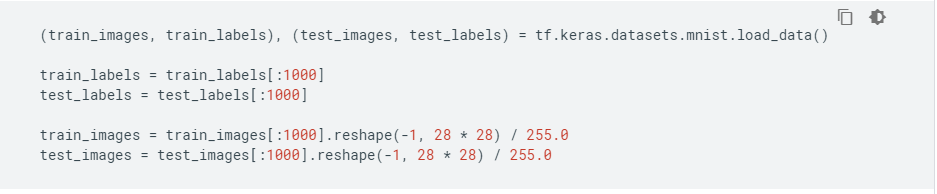

전처리 해준다.

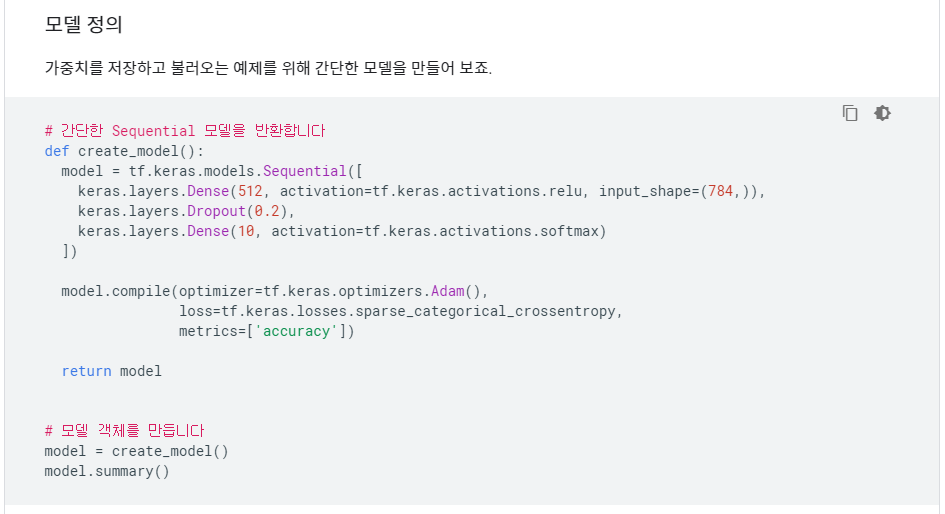

함수로 만든다.

- metrics=['accuracy']  = 'acc'해도 된다.

In [33]:
y_train = y_train[:1000]
y_test = y_test[:1000]

X_train = X_train[:1000].reshape(-1, 28 * 28) / 255.0
X_test = X_test[:1000].reshape(-1, 28 * 28) / 255.0

In [34]:
def create_model():
    model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.keras.activations.relu, input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.keras.activations.softmax)
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

    return model

In [35]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [39]:
# 체크포인트 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [40]:
model = create_model()

In [42]:
model.fit(X_train, y_train,  epochs = 10,
          validation_data = (X_test,y_test),
          callbacks = [cp_callback])  # 훈련 단계에 콜백을 전달합니다

# 옵티마이저의 상태를 저장하는 것과 관련되어 경고가 발생할 수 있습니다.
# 이 경고는 (그리고 이 노트북의 다른 비슷한 경고는) 이전 사용 방식을 권장하지 않기 위함이며 무시해도 좋습니다.

W0625 16:34:02.607771  1356 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 736/1000 [=====================>........] - ETA: 0s - loss: 1.3147 - accuracy: 0.6209
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 323us/sample - loss: 1.1441 - accuracy: 0.6730 - val_loss: 0.7033 - val_accuracy: 0.7840
Epoch 2/10
 768/1000 [======================>.......] - ETA: 0s - loss: 0.4365 - accuracy: 0.8737
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 134us/sample - loss: 0.4226 - accuracy: 0.8780 - val_loss: 0.5396 - val_accuracy: 0.8320
Epoch 3/10
 736/1000 [=====================>........] - ETA: 0s - loss: 0.2761 - accuracy: 0.9226
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 131us/sample - loss: 0.2674 - accuracy: 0.9270 - val_loss: 0.4447 - val_accuracy: 0.8600
Epoch 4/10
 736/1000 [=====================>........] - ETA: 0s - loss: 0.1938 - accuracy: 0.9592
Epoch

In [43]:
model = create_model()

loss, acc = model.evaluate(X_test, y_test)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 61us/sample - loss: 2.3386 - accuracy: 0.0840
훈련되지 않은 모델의 정확도:  8.40%


In [44]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(X_test, y_test)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 24us/sample - loss: 0.3950 - accuracy: 0.8740
복원된 모델의 정확도: 87.40%


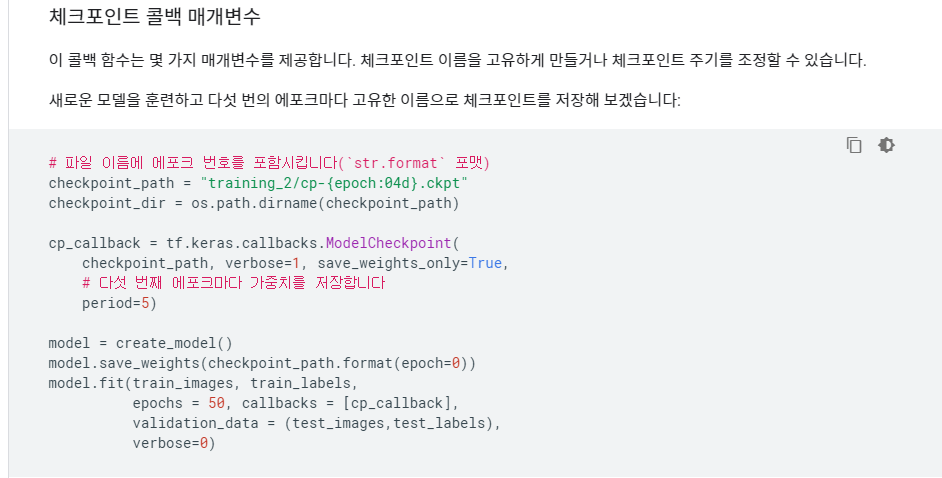

In [45]:
# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [46]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # 다섯 번째 에포크마다 가중치를 저장합니다
    period=5)


W0625 16:40:57.985134  1356 callbacks.py:859] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


In [47]:
model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(X_train, y_train,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (X_test,y_test),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [48]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2\\cp-0050.ckpt'

In [49]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(X_test, y_test)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 60us/sample - loss: 0.4712 - accuracy: 0.8750
복원된 모델의 정확도: 87.50%


In [51]:
# 가중치를 저장합니다
model.save_weights('./checkpoints/my_checkpoint')

# 가중치를 복원합니다
model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(X_test, y_test)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 61us/sample - loss: 0.4712 - accuracy: 0.8750
복원된 모델의 정확도: 87.50%


In [52]:
model = create_model()

model.fit(X_train, y_train, epochs=5)

# 전체 모델을 HDF5 파일로 저장합니다
model.save('my_model.h5')

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 172us/sample - loss: 1.1450 - accuracy: 0.6800
Epoch 2/5
1000/1000 [==============================] - 0s 70us/sample - loss: 0.4199 - accuracy: 0.8840
Epoch 3/5
1000/1000 [==============================] - 0s 68us/sample - loss: 0.2883 - accuracy: 0.9330
Epoch 4/5
1000/1000 [==============================] - 0s 73us/sample - loss: 0.2095 - accuracy: 0.9530
Epoch 5/5
1000/1000 [==============================] - 0s 72us/sample - loss: 0.1510 - accuracy: 0.9720


In [53]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
import pandas as pd

In [57]:
h5 = pd.read_hdf('my_model.h5')

ValueError: No dataset in HDF5 file.